In [1]:
import os
import time 
import uuid 
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [3]:
# cap = cv2.VideoCapture(0)
# for imgnum in range(number_images):
#     print("Collecting image {}".format(imgnum))
#     ret, frame = cap.read()
#     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame',frame)
#     time.sleep(0.5)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [4]:
import onnxruntime as ort

print("ONNX Runtime loaded successfully.")
print("Version:", ort.__version__)

ONNX Runtime loaded successfully.
Version: 1.15.1


In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

In [8]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg')

In [9]:
images.as_numpy_iterator().next()

b'data\\images\\8d686b12-5190-11f0-b27c-7412b38be852.jpg'

In [10]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [11]:
images = images.map(load_image)

In [12]:
images.as_numpy_iterator().next()

array([[[252, 216, 122],
        [253, 217, 123],
        [255, 218, 127],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 216, 122],
        [254, 218, 124],
        [255, 220, 126],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[252, 216, 120],
        [254, 218, 122],
        [255, 221, 123],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[215, 104,  76],
        [215, 104,  76],
        [215, 106,  77],
        ...,
        [210, 195, 164],
        [186, 174, 148],
        [167, 156, 134]],

       [[217, 103,  77],
        [215, 104,  77],
        [214, 104,  77],
        ...,
        [193, 178, 149],
        [150, 140, 115],
        [157, 151, 127]],

       [[215, 101,  75],
        [214, 103,  76],
        [214, 104,  79],
        ...,
        [153, 138, 109],
        [150, 143, 117],
        [150, 146, 121]]

In [13]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [14]:
image_generator = images.batch(4).as_numpy_iterator()

In [15]:
plot_images = image_generator.next()

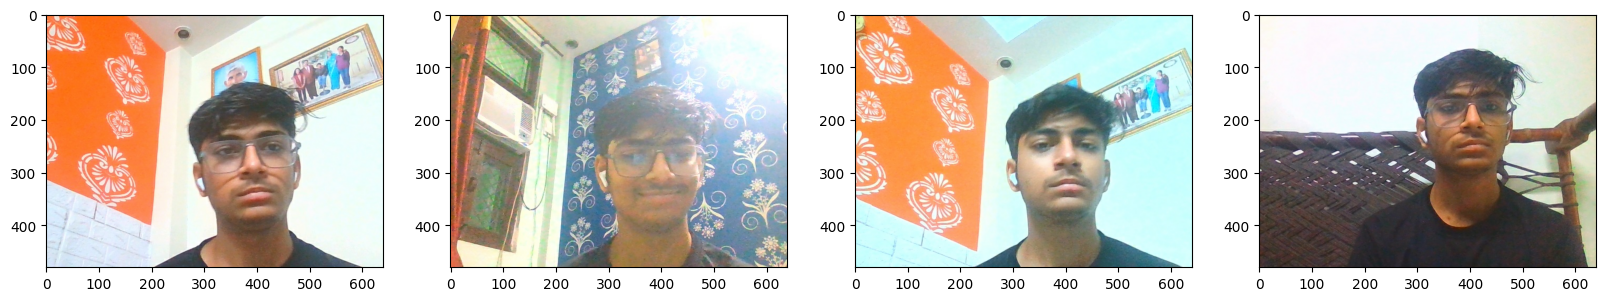

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [17]:
import os

In [18]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder,'images')):

        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data','labels',filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath,new_filepath)

In [19]:
import albumentations as alb

In [20]:
# pip install ipywidgets --upgrade


In [21]:
augmentor = alb.Compose([alb.RandomCrop(width=450,height=450),
                        alb.HorizontalFlip(p=0.5),
                        alb.RandomBrightnessContrast(p=0.2),
                        alb.RandomGamma(p=0.2),
                        alb.RGBShift(p=0.2),
                        alb.VerticalFlip(p=0.5)],
                       bbox_params = alb.BboxParams(format='albumentations',
                                                   label_fields = ['class_labels']))

In [22]:
img = cv2.imread(os.path.join('data','train','images','8c79cc6e-5190-11f0-b0e9-7412b38be852.jpg'))

In [23]:
img

array([[[230, 254, 254],
        [230, 254, 254],
        [232, 253, 254],
        ...,
        [178, 209, 232],
        [175, 204, 231],
        [171, 199, 229]],

       [[231, 255, 255],
        [231, 255, 255],
        [233, 254, 255],
        ...,
        [177, 208, 229],
        [174, 204, 229],
        [170, 199, 226]],

       [[231, 255, 255],
        [231, 255, 255],
        [233, 254, 255],
        ...,
        [178, 211, 230],
        [177, 208, 231],
        [174, 204, 229]],

       ...,

       [[ 27,  39,  57],
        [ 24,  38,  56],
        [ 26,  38,  56],
        ...,
        [ 73,  95,  16],
        [ 77,  96,  17],
        [ 80,  99,  20]],

       [[ 25,  35,  52],
        [ 23,  36,  52],
        [ 25,  35,  52],
        ...,
        [ 67,  93,  15],
        [ 69,  91,  12],
        [ 72,  94,  15]],

       [[ 24,  35,  49],
        [ 24,  35,  49],
        [ 24,  35,  49],
        ...,
        [ 59,  88,   9],
        [ 62,  87,   7],
        [ 67,  92,  12]]

In [24]:
with open(os.path.join('data','train','labels','8c79cc6e-5190-11f0-b0e9-7412b38be852.json'),'r')as f:
    label = json.load(f)

In [25]:
label['shapes']

[{'label': 'Gaurav',
  'points': [[294.43609022556393, 193.0075187969925],
   [507.9699248120301, 363.6842105263158]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {},
  'mask': None}]

In [26]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [27]:
coords

[294.43609022556393, 193.0075187969925, 507.9699248120301, 363.6842105263158]

In [28]:
coords = list(np.divide(coords,[640,480,640,480]))

In [29]:
coords

[0.46005639097744366,
 0.4020989974937344,
 0.7937030075187971,
 0.7576754385964912]

In [30]:
augmented = augmentor(image=img,bboxes=[coords],class_labels=['Gaurav'])

In [31]:
augmented['bboxes']

[[0.1600668165418837,
  0.41335002687242295,
  0.6345864613850911,
  0.7926315477159288]]

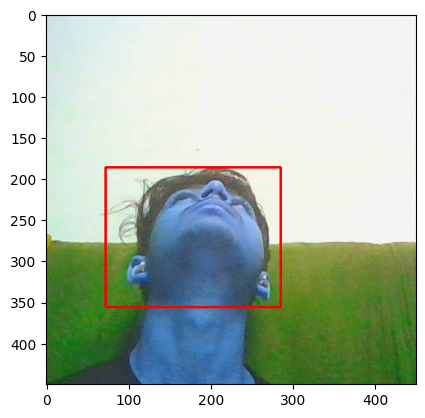

In [32]:
cv2.rectangle(augmented['image'],
             tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
             tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
             (250,0,0),2)

plt.imshow(augmented['image'])

In [33]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.81719923 0.89395362 0.4212876  0.2767857  1.        ].
x_max is less than or equal to x_min for bbox [1.17011279e-01 9.92637873e-01 2.22044608e-17 5.51678658e-01
 1.00000000e+00].
x_max is less than or equal to x_min for bbox [0.75375938 0.48668545 0.39813474 0.         1.        ].


In [34]:
train_images= tf.data.Dataset.list_files('aug_data/train/images/*.jpg',shuffle=False)
train_images= train_images.map(load_image)
train_images= train_images.map(lambda x: tf.image.resize(x,(120,120)))
train_images= train_images.map(lambda x:x/255)

In [35]:
test_images= tf.data.Dataset.list_files('aug_data/test/images/*.jpg',shuffle=False)
test_images= test_images.map(load_image)
test_images= test_images.map(lambda x: tf.image.resize(x,(120,120)))
test_images= test_images.map(lambda x:x/255)

In [36]:
val_images= tf.data.Dataset.list_files('aug_data/val/images/*.jpg',shuffle=False)
val_images= val_images.map(load_image)
val_images= val_images.map(lambda x: tf.image.resize(x,(120,120)))
val_images= val_images.map(lambda x:x/255)

In [37]:
train_images.as_numpy_iterator().next()

array([[[0.9857843 , 0.99944854, 0.91219366],
        [0.9965686 , 1.        , 0.9429534 ],
        [0.997549  , 1.        , 0.96960783],
        ...,
        [0.6618872 , 0.3824755 , 0.28688726],
        [0.7012868 , 0.40686274, 0.31390932],
        [0.6968137 , 0.4165441 , 0.29491422]],

       [[0.9916667 , 0.9995098 , 0.9137255 ],
        [0.99313724, 0.9995098 , 0.9141544 ],
        [0.99607843, 1.        , 0.9292892 ],
        ...,
        [0.62487745, 0.40153188, 0.28621325],
        [0.658701  , 0.4122549 , 0.27493873],
        [0.7019608 , 0.44001225, 0.28431374]],

       [[0.99607843, 0.9965686 , 0.9485294 ],
        [0.9965686 , 0.9990809 , 0.93492645],
        [0.99221814, 0.9961397 , 0.93927693],
        ...,
        [0.6317402 , 0.42726716, 0.27181372],
        [0.64724267, 0.40563726, 0.24632353],
        [0.6858456 , 0.4333946 , 0.26378676]],

       ...,

       [[0.42726716, 0.44154412, 0.42077205],
        [0.42444852, 0.42291668, 0.40104166],
        [0.42683825, 0

In [38]:
def load_lables(label_path):
    with open(label_path.numpy(),'r',encoding = 'utf-8') as f:
        label = json.load(f)
    return [label['class']],label['bbox']

In [39]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json',shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_lables,[x],[tf.uint8,tf.float16]))

In [40]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json',shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_lables,[x],[tf.uint8,tf.float16]))

In [41]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json',shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_lables,[x],[tf.uint8,tf.float16]))

In [42]:
len(train_images),len(train_labels),len(test_images),len(test_labels),len(val_images),len(val_labels)

(3840, 3840, 780, 780, 780, 780)

In [43]:
train = tf.data.Dataset.zip((train_images,train_labels))
train = train.shuffle(5000)

In [44]:
train = train.batch(8)
train = train.prefetch(4)

In [45]:
test = tf.data.Dataset.zip((test_images,test_labels))
test = test.shuffle(5000)
test = test.batch(8)
test = test.prefetch(4)

In [46]:
val = tf.data.Dataset.zip((val_images,val_labels))
val = val.shuffle(5000)
val = val.batch(8)
val = val.prefetch(4)

In [47]:
test.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.4968, 0.2502, 1.    , 0.803 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.414 , 0.2825, 1.    ],
        [0.2252, 0.0598, 0.7466, 0.6646],
        [0.1327, 0.4373, 0.6074, 1.    ],
        [0.2903, 0.2079, 0.8   , 0.7607],
        [0.2263, 0.1215, 0.6924, 0.594 ]], dtype=float16))

In [48]:
data_samples = train.as_numpy_iterator()

In [49]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


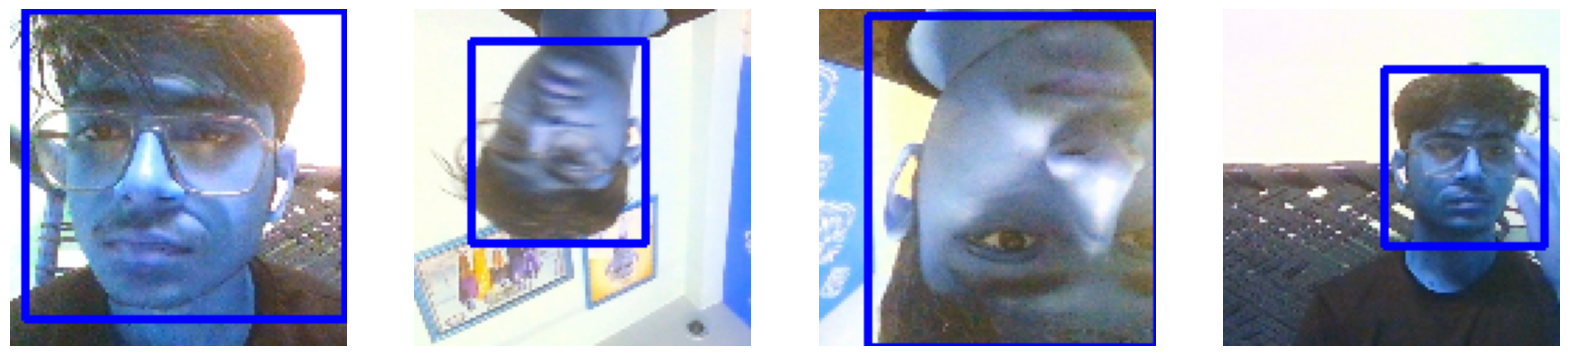

In [50]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4): 
    sample_image = res[0][idx].copy()  
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(
        sample_image, 
        tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
        tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
        (255, 0, 0),
        2
    )

    ax[idx].imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
    ax[idx].axis('off')


In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Flatten, GlobalMaxPooling2D,Dense
from tensorflow.keras.applications import VGG16

In [52]:
vgg = VGG16(include_top=False)

In [53]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [54]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048,activation='relu')(f1)
    class2 = Dense(1,activation='sigmoid')(class1)

    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048,activation='relu')(f2)
    regress2 = Dense(4,activation='sigmoid')(regress1)

    facetracker = Model(inputs = input_layer,outputs = [class2,regress2])
    return facetracker

In [55]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3367  , 0.4045  , 0.7075  , 0.7905  ],
        [0.2015  , 0.4016  , 0.751   , 1.      ],
        [0.2219  , 0.3464  , 0.765   , 0.9165  ],
        [0.2878  , 0.      , 1.      , 1.      ],
        [0.7417  , 0.0642  , 1.      , 0.5923  ],
        [0.298   , 0.001738, 0.617   , 0.2407  ],
        [0.557   , 0.3364  , 1.      , 0.9395  ],
        [0.      , 0.      , 0.65    , 1.      ]], dtype=float16))

In [56]:
facetracker = build_model()

In [57]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [58]:
x,y = train.as_numpy_iterator().next()

In [59]:
x.shape

(8, 120, 120, 3)

In [60]:
classes,coords = facetracker.predict(x)

1/1 [==============================] - 3s 3s/step


In [61]:
classes,coords

(array([[0.57749134],
        [0.601044  ],
        [0.5237255 ],
        [0.5296784 ],
        [0.5500516 ],
        [0.47980455],
        [0.54168373],
        [0.6234387 ]], dtype=float32),
 array([[0.54119766, 0.31413585, 0.34531796, 0.40875494],
        [0.5863247 , 0.28506896, 0.36121726, 0.4043361 ],
        [0.6050364 , 0.5117432 , 0.4123886 , 0.31596375],
        [0.5372713 , 0.35278955, 0.3620792 , 0.41158402],
        [0.54655075, 0.50515777, 0.39727977, 0.30571827],
        [0.47712293, 0.37759697, 0.36424172, 0.33349255],
        [0.5934883 , 0.3229172 , 0.35447007, 0.4854367 ],
        [0.6278607 , 0.3836769 , 0.3956298 , 0.31430253]], dtype=float32))

In [62]:
len(train)

480

In [63]:
batches_per_epoch = 480
# lr_decay = (1./0.75-1)/batches_per_epoch
initial_lr = 0.0001
target_lr_fraction = 0.75
decay_rate = target_lr_fraction ** (1 / batches_per_epoch)

In [64]:
# lr_decay

In [65]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
# opt = tf.keras.optimizers.Adam(learning_rate=0.0001,decay=lr_decay)
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=1,  # decay every step
    decay_rate=decay_rate
)

opt = Adam(learning_rate=lr_schedule)


In [66]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2]- yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coord + delta_size

In [67]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [68]:
localization_loss(y[1],coords).numpy()

8.156037

In [69]:
classloss(y[0],classes).numpy()

0.5947647

In [70]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=8.156037>

In [71]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [72]:
model = FaceTracker(facetracker)

In [73]:
model.compile(opt, classloss ,regressloss)

In [74]:
logdir = 'logs'

In [75]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [76]:
import os
os.path.exists("checkpoint.h5")

True

In [77]:
dummy_input = tf.random.normal((1, 120, 120, 3))
_ = model(dummy_input)  # forward pass to build model

checkpoint_path = "checkpoint.h5"

if os.path.exists(checkpoint_path):
    print("✅ Checkpoint found! Loading weights...")
    model.load_weights(checkpoint_path)
else:
    print("⚠️ No checkpoint found. Starting from scratch.")

✅ Checkpoint found! Loading weights...


In [78]:
model.load_weights("checkpoint.h5")
model.evaluate(val)


98/98 [==============================] - 132s 1s/step - total_loss: 0.4294 - class_loss: 0.1064 - regress_loss: 0.3762


[0.0461859330534935, 0.09105043113231659, 0.11414340138435364]

In [79]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[checkpoint_cb])

NameError: name 'checkpoint_cb' is not defined

In [84]:
hist = model.fit(train, epochs=11, initial_epoch=10, validation_data=val, callbacks=[checkpoint_cb])

Epoch 11/11
480/480 [==============================] - ETA: 0s - total_loss: 0.0806 - class_loss: 0.0198 - regress_loss: 0.0707         
Epoch 11: saving model to checkpoint.h5
480/480 [==============================] - 2364s 5s/step - total_loss: 0.0805 - class_loss: 0.0197 - regress_loss: 0.0706 - val_total_loss: 0.0204 - val_class_loss: 2.9653e-06 - val_regress_loss: 0.0204


In [80]:
import os
os.path.exists("checkpoint.h5")

True

In [81]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cb = ModelCheckpoint("checkpoint.h5",  # or .keras
                                save_weights_only=True,
                                save_freq='epoch',
                                verbose=1)

In [83]:
checkpoint_path = "checkpoint.h5"

if os.path.exists(checkpoint_path):
    print("✅ Checkpoint found! Loading weights...")
    model.load_weights(checkpoint_path)
else:
    print("⚠️ No checkpoint found. Starting from scratch.")


✅ Checkpoint found! Loading weights...


In [85]:
hist

In [86]:
hist.history

{'total_loss': [0.031720761209726334],
 'class_loss': [2.771624622255331e-06],
 'regress_loss': [0.031719375401735306],
 'val_total_loss': [0.020406130701303482],
 'val_class_loss': [2.965347675853991e-06],
 'val_regress_loss': [0.020404648035764694]}

In [89]:
# fig, ax = plt.subplots(ncols=3, figsize=(20,5))

# ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
# ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
# ax[0].title.set_text('Loss')
# ax[0].legend()

# ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
# ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
# ax[1].title.set_text('Classification Loss')
# ax[1].legend()

# ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
# ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
# ax[2].title.set_text('Regression Loss')
# ax[2].legend()

# plt.show()

In [90]:
test_data = test.as_numpy_iterator()

In [91]:
test_sample = test_data.next()

In [92]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 1s 1s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


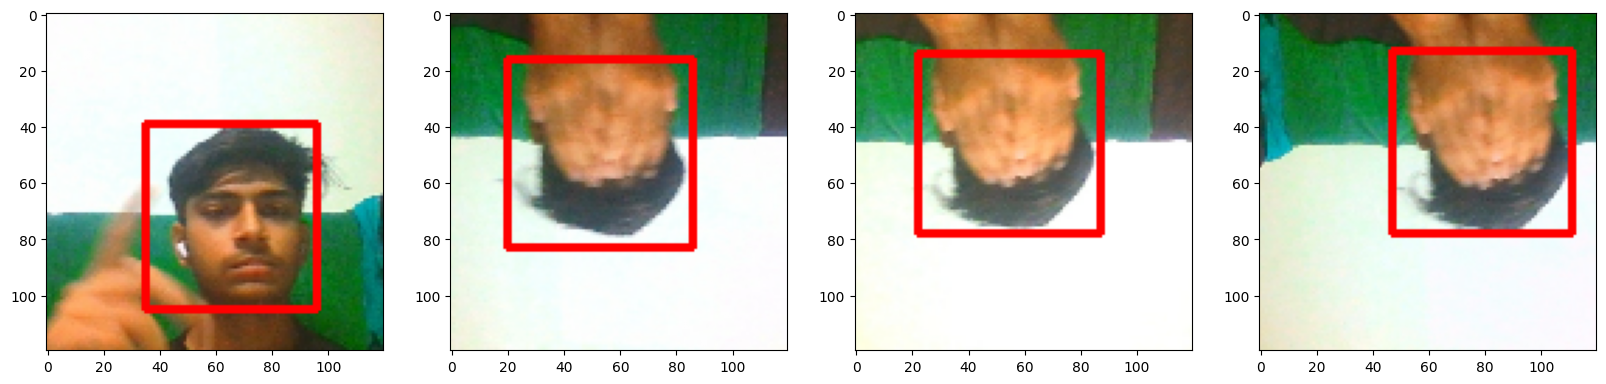

In [94]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4): 
    sample_image = test_sample[0][idx].copy()  # ✅ make it writable
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(
            sample_image, 
            tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
            tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)), 
            (255, 0, 0), 
            2
        )
    
    ax[idx].imshow(sample_image)


In [6]:
from tensorflow.keras.models import load_model

In [97]:
facetracker.save('facetracker.keras')


In [7]:
facetracker = load_model('facetracker.keras')

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'Gaurav', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 324ms/step


KeyboardInterrupt: 